# WAV Practice

## By: Austin Anderson

The purpose of this notebook is to become more familiar with audio data. Some of the spectrograms are not in their best format because this was my first attempts. Another notebook has some better examples.

### Importing Libraries

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from glob import glob
import IPython.display
import tqdm
from keras.utils import to_categorical

### Loading one file

In [4]:
audio, sfreq = lr.load(r"D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold1\7061-6-0-0.wav")

In [11]:
IPython.display.Audio(data=audio, rate=sfreq)

Remember: The length of raw audio array (aka samples) is simply the time over sample rate!

In [15]:
print("Length of audio array: " + str(np.shape(audio))); 

print("Sample Rate: "+str(sfreq))

print("Time of audio: "+ str(49613/22050))

Length of audio array: (49613,)
Sample Rate: 22050
Time of audio: 2.2500226757369615


In [16]:
# Easy librosa function to get time:
librosa.get_duration(audio)

2.2500226757369615

Text(0.5, 1.0, 'Monophonic Audio')

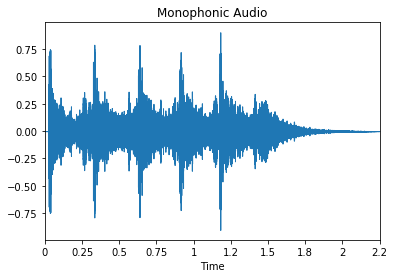

In [20]:
librosa.display.waveplot(audio, sfreq)
plt.title('Monophonic Audio')

In [57]:
configs = {}

configs['sampling_rate'] = 22050
configs['duration'] = 4
configs['hop_length'] = 882 # 20ms
configs['fmin'] = 20
configs['fmax'] = configs['sampling_rate'] // 2
configs['n_mels'] = 128
configs['n_fft'] = configs['n_mels'] * 20
configs['samples'] = configs['sampling_rate'] * configs['duration']
configs['dims'] = (configs['n_mels'], 1 + int(np.floor(configs['samples']/configs['hop_length'])), 1)

In [58]:
print(configs)

{'sampling_rate': 22050, 'duration': 4, 'hop_length': 882, 'fmin': 20, 'fmax': 11025, 'n_mels': 128, 'n_fft': 2560, 'samples': 88200, 'dims': (128, 101, 1)}


In [97]:
# This is the same as power_to_db(S**2), but more convenient.
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

np.shape(D)

(1025, 97)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

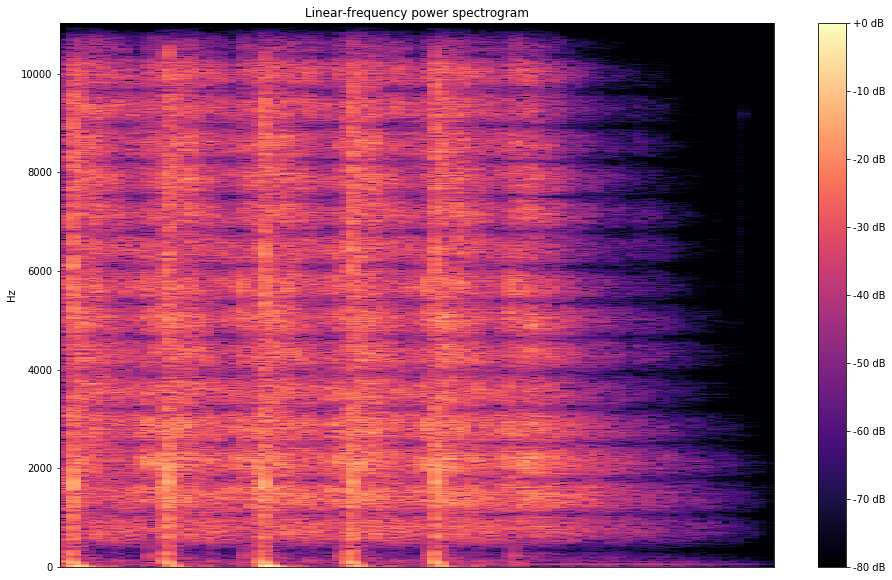

In [96]:
plt.figure(figsize=(16, 10))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Log-frequency power spectrogram')

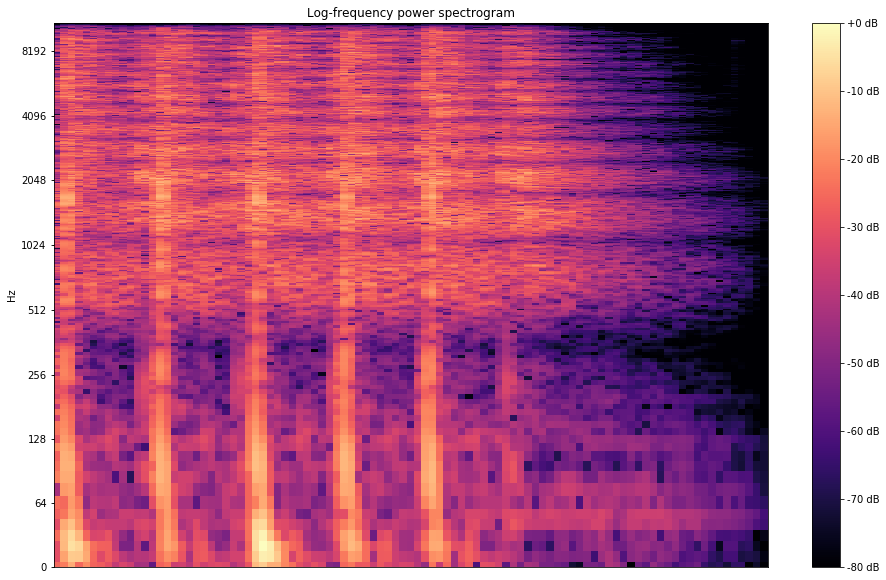

In [90]:
plt.figure(figsize=(16, 10))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [214]:
S = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,
                                    fmax=sfreq//2)

In [215]:
np.shape(S)

(128, 97)

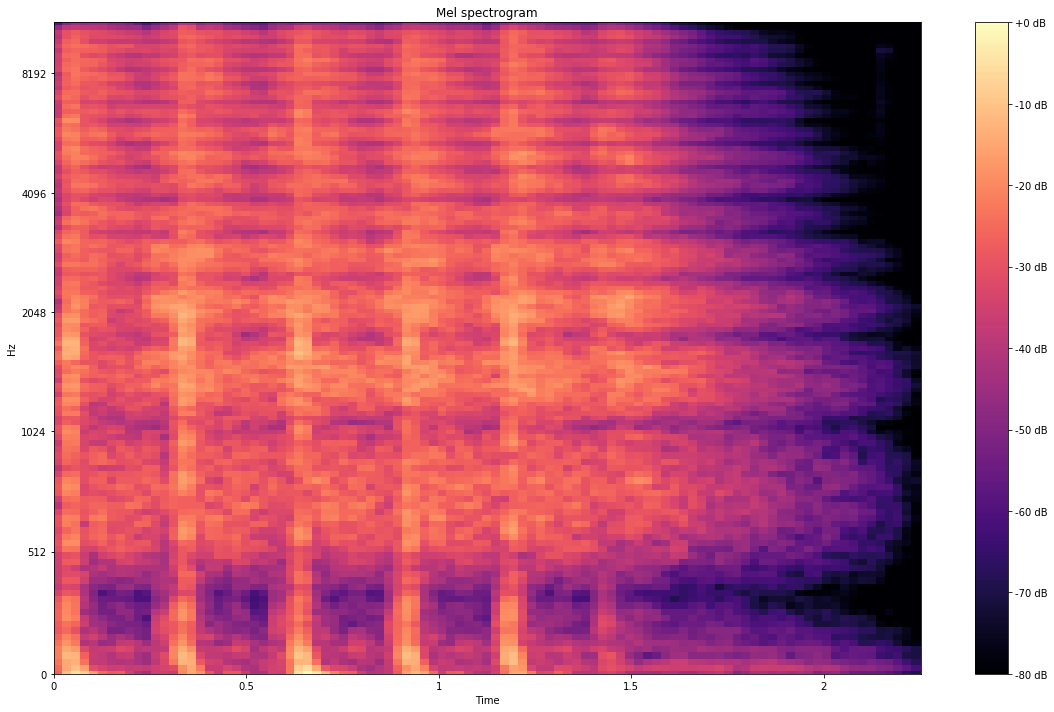

In [101]:
plt.figure(figsize=(16, 10))
lr.display.specshow(lr.power_to_db(S, ref=np.max),
                         y_axis='mel', fmax=sfreq/2,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [103]:
S2 = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,hop_length = 882,
                                    fmax=sfreq//2)

np.shape(S2)

(128, 57)

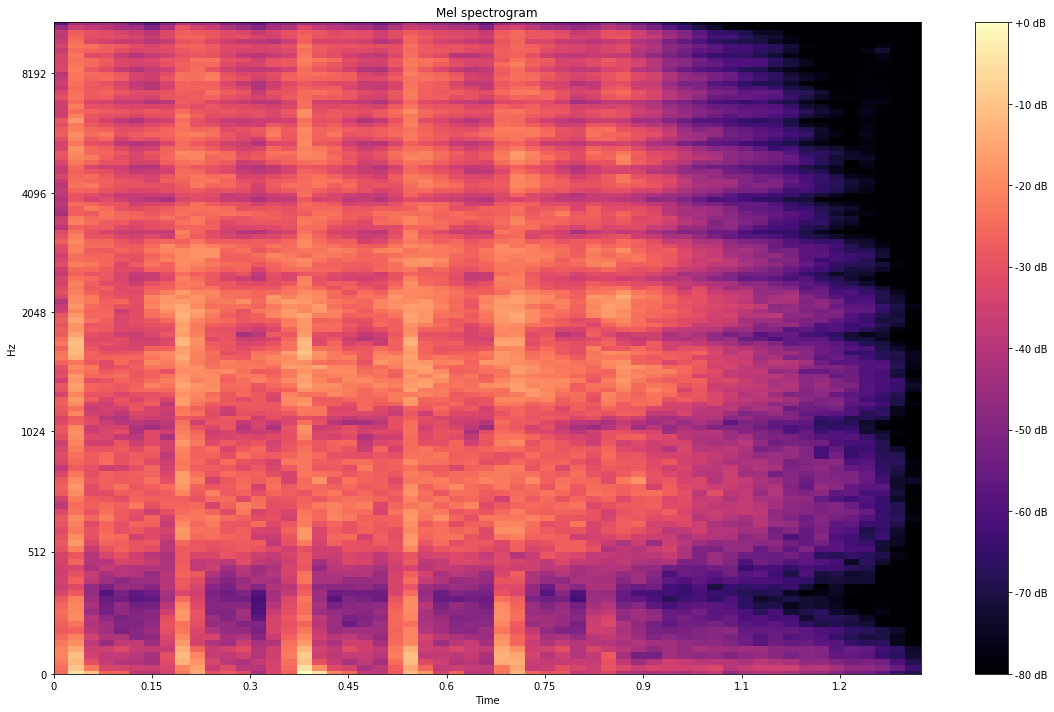

In [104]:
plt.figure(figsize=(16, 10))
lr.display.specshow(lr.power_to_db(S2, ref=np.max),
                         y_axis='mel', fmax=sfreq/2,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

### Padding

In [108]:
padding = configs['samples'] - len(audio)
print(padding)

offset = padding // 2

print(offset)

padded_audio = np.pad(audio, (offset, configs['samples'] - len(audio) - offset), 'constant')

print(np.shape(padded_audio))

38587
19293
(88200,)


In [111]:
# This is the same as power_to_db(S**2), but more convenient.
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(padded_audio)), ref=np.max)

np.shape(D2)

(1025, 173)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

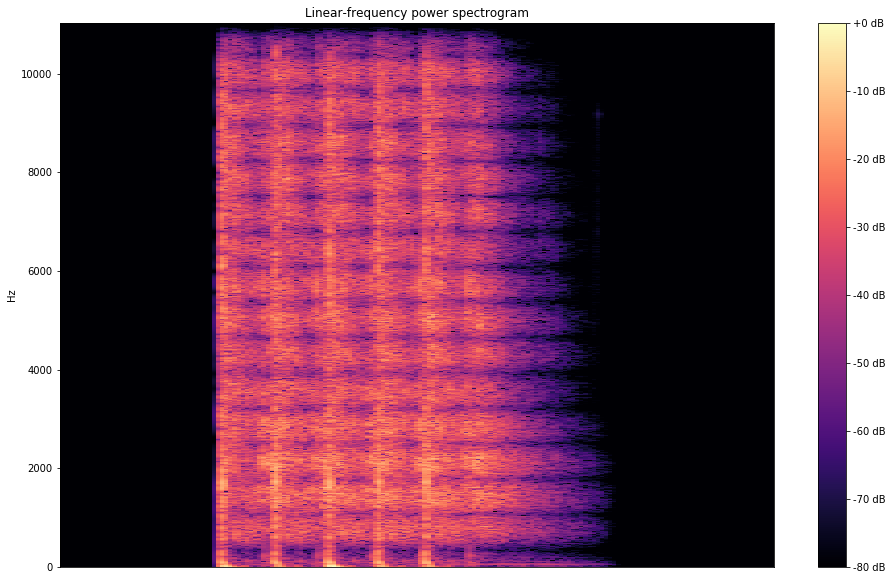

In [113]:
plt.figure(figsize=(16, 10))
librosa.display.specshow(D2, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [182]:
S3 = lr.feature.melspectrogram(y=padded_audio, sr=sfreq, n_mels=128,hop_length = 882,
                                    fmax=sfreq//2)

np.shape(S3)

(128, 101)

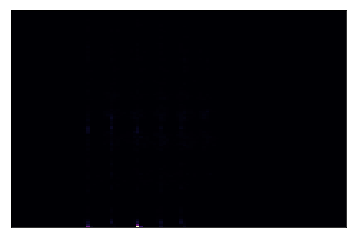

In [220]:
lr.display.specshow(S3)

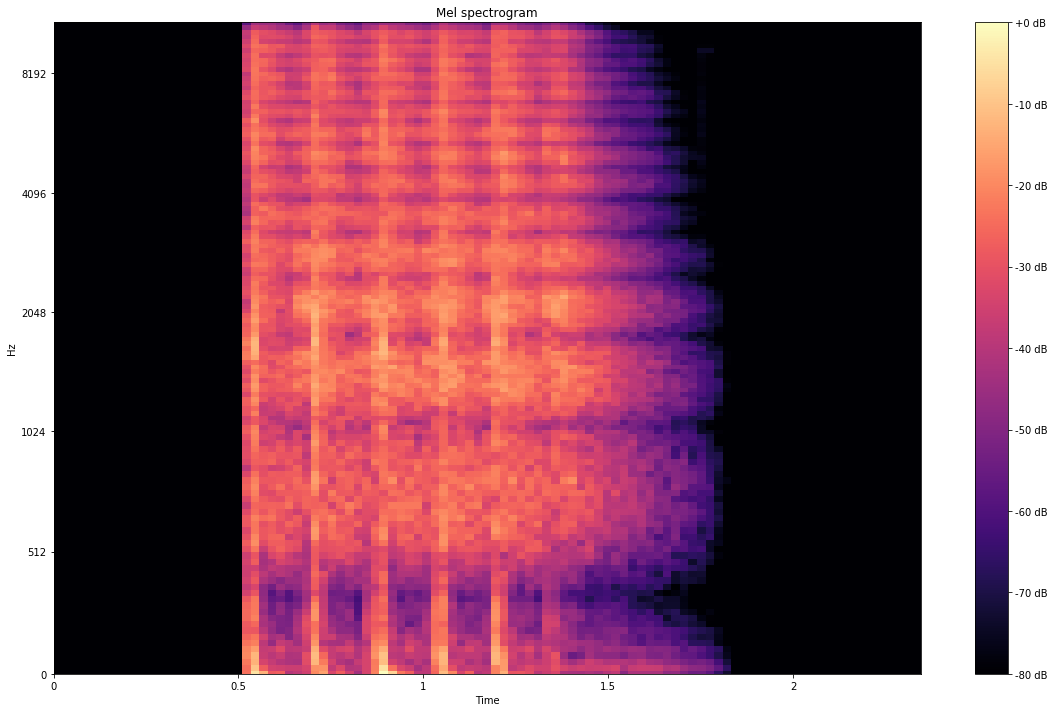

In [183]:
plt.figure(figsize=(16, 10))
lr.display.specshow(lr.power_to_db(S3, ref=np.max),
                         y_axis='mel', fmax=sfreq/2,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [210]:
#S3 -= (np.mean(S3, axis=0) + 1e-8)

#np.shape(S3)

S4 = librosa.util.normalize(S3, axis=0)

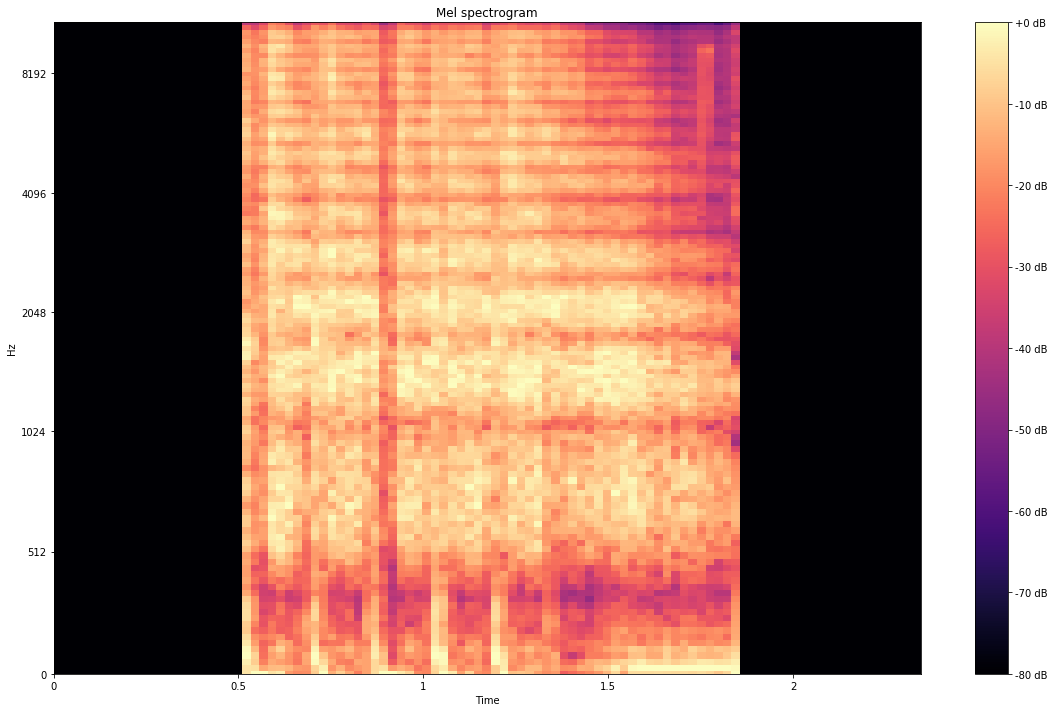

In [211]:
plt.figure(figsize=(16, 10))
lr.display.specshow(lr.power_to_db(S4, ref=np.max),
                         y_axis='mel', fmax=sfreq/2,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

## Let's try a different sound to see if our settings look good!

In [245]:
audio, sfreq = lr.load(r"D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold1\21684-9-0-30.wav")

In [248]:
IPython.display.Audio(data=audio, rate=sfreq)

In [253]:
# This is the same as power_to_db(S**2), but more convenient.
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

np.shape(D)

(1025, 173)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

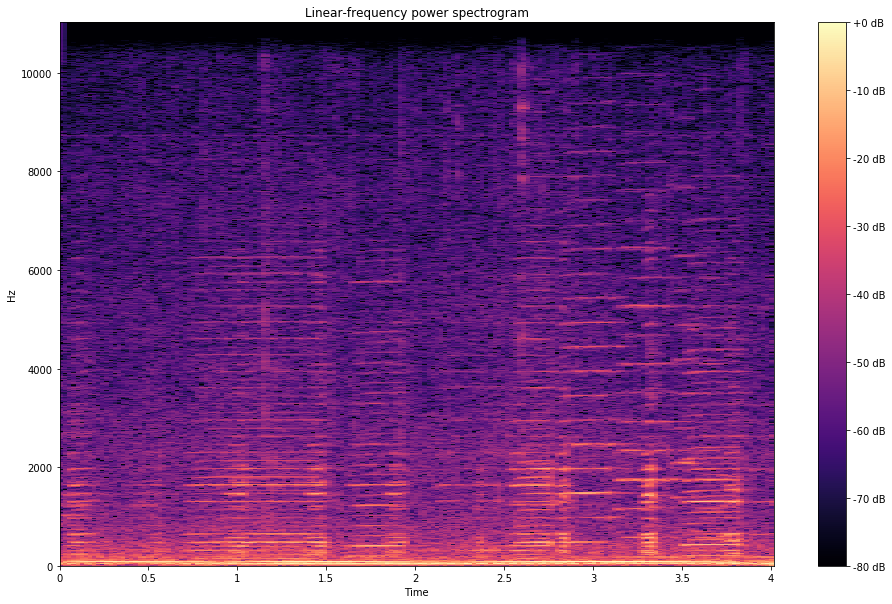

In [267]:
plt.figure(figsize=(16, 10))
librosa.display.specshow(D, y_axis='linear', x_axis = 'time')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'log-frequency power spectrogram')

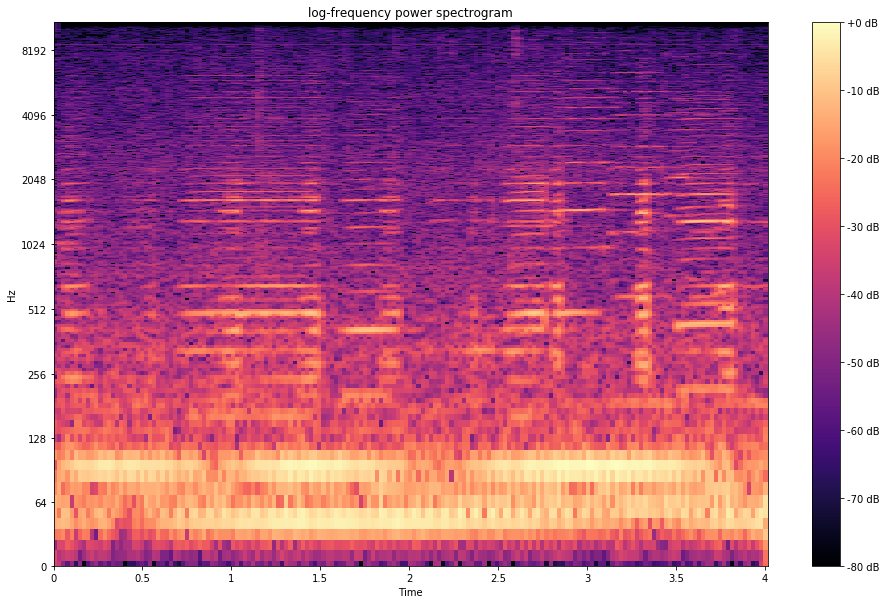

In [268]:
plt.figure(figsize=(16, 10))
librosa.display.specshow(D, y_axis='log', x_axis = 'time')
plt.colorbar(format='%+2.0f dB')
plt.title('log-frequency power spectrogram')

In [258]:
S5 = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,hop_length = 882,
                                    fmax=sfreq//2)

np.shape(S5)

(128, 101)

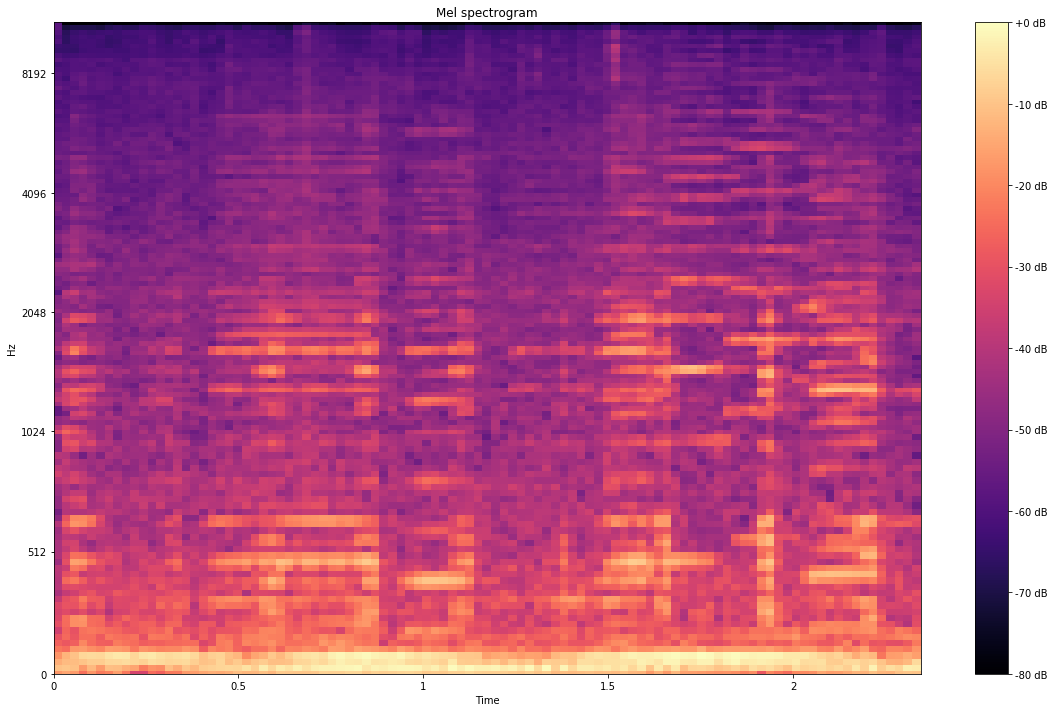

In [259]:
plt.figure(figsize=(16, 10))
lr.display.specshow(lr.power_to_db(S5, ref=np.max),
                         y_axis='mel', fmax=sfreq/2,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

### Alright, one more sound for practice

In [264]:
audio, sfreq = lr.load(r"D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold2\14387-9-0-15.wav")

In [265]:
IPython.display.Audio(data=audio, rate=sfreq)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

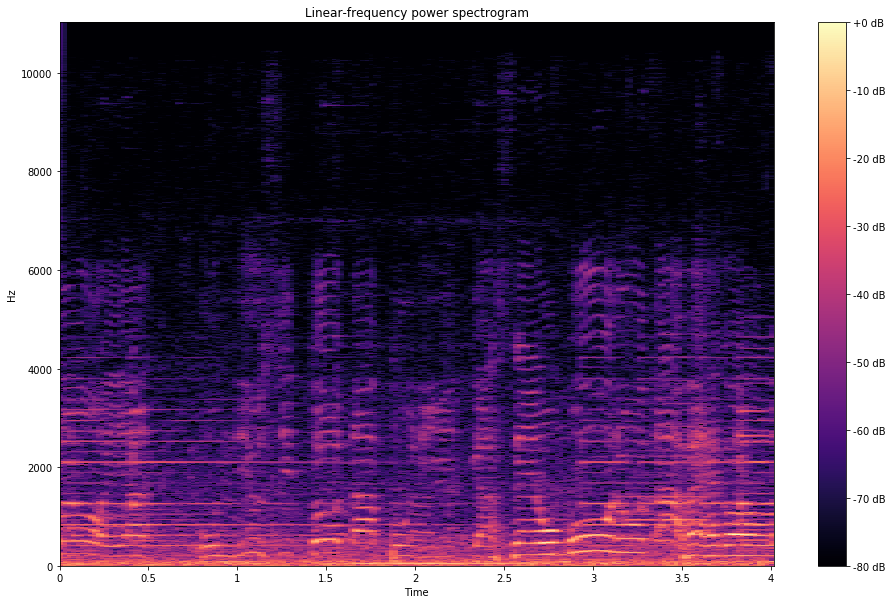

In [269]:
# This is the same as power_to_db(S**2), but more convenient.
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

plt.figure(figsize=(16, 10))
librosa.display.specshow(D, y_axis='linear', x_axis = 'time')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

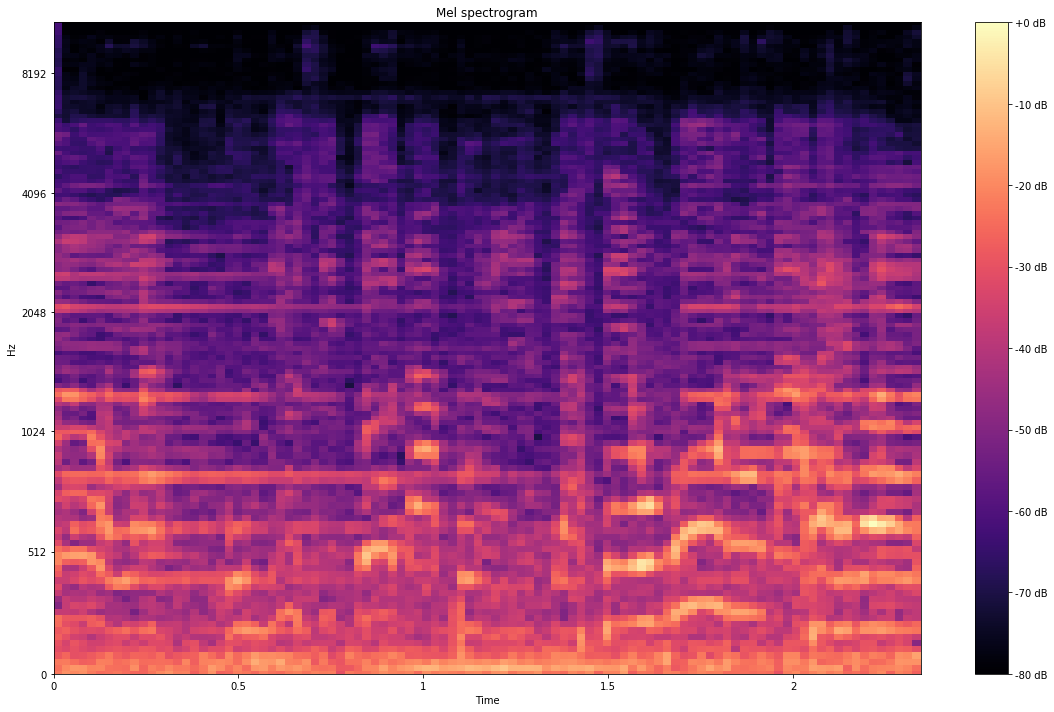

In [275]:
S5 = lr.feature.melspectrogram(y=audio, sr=sfreq, n_mels=128,hop_length = 882,
                                    fmax=sfreq//2)

plt.figure(figsize=(16, 10))
lr.display.specshow(lr.power_to_db(S5, ref=np.max),
                         y_axis='mel', fmax=sfreq/2,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

### Okay, time to practice actually reading in data!

In [158]:
practice_metadata = pd.read_csv(r"D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice_csv\urban_practice.csv")

In [159]:
practice_metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,7061-6-0-0.wav,7061,0.978088,3.231723,1,1,6,gun_shot
1,21684-9-0-30.wav,21684,15.000000,19.000000,1,1,9,street_music
2,57320-0-0-15.wav,57320,7.500000,11.500000,2,1,0,air_conditioner
3,4911-3-0-0.wav,4911,0.008108,0.217438,1,2,3,dog_bark
4,14387-9-0-15.wav,14387,7.500000,11.500000,1,2,9,street_music
5,34621-4-17-0.wav,34621,18.754374,19.590761,1,2,4,drilling
6,6988-5-0-0.wav,6988,0.000000,4.000000,1,3,5,engine_idling
7,13230-0-0-3.wav,13230,1.500000,5.500000,1,3,0,air_conditioner
8,15356-2-0-1.wav,15356,0.500000,4.500000,1,3,2,children_playing


In [193]:
practice_metadata.set_index('slice_file_name', inplace = True)

In [194]:
practice_metadata

,fsID,start,end,salience,fold,classID,class
slice_file_name,,,,,,,
7061-6-0-0.wav,7061,0.978088,3.231723,1,1,6,gun_shot
21684-9-0-30.wav,21684,15.000000,19.000000,1,1,9,street_music
57320-0-0-15.wav,57320,7.500000,11.500000,2,1,0,air_conditioner
4911-3-0-0.wav,4911,0.008108,0.217438,1,2,3,dog_bark
14387-9-0-15.wav,14387,7.500000,11.500000,1,2,9,street_music
34621-4-17-0.wav,34621,18.754374,19.590761,1,2,4,drilling
6988-5-0-0.wav,6988,0.000000,4.000000,1,3,5,engine_idling
13230-0-0-3.wav,13230,1.500000,5.500000,1,3,0,air_conditioner
15356-2-0-1.wav,15356,0.500000,4.500000,1,3,2,children_playing


In [207]:
for file in practice_metadata.index:
    print('D:\\Machine_Learning\\UrbanSound8K\\UrbanSound8K\\practice\\fold'+str(practice_metadata.at[file, 'fold'])+file)
#D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
#np.shape(D)

D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold17061-6-0-0.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold121684-9-0-30.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold157320-0-0-15.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold24911-3-0-0.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold214387-9-0-15.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold234621-4-17-0.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold36988-5-0-0.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold313230-0-0-3.wav
D:\Machine_Learning\UrbanSound8K\UrbanSound8K\practice\fold315356-2-0-1.wav


#### This is my first attempt at storing a train and validation set for one run of CV. Another notebook has the more comprehensive version.

In [282]:
X = []
Y = []

for file in practice_metadata.index:
    # For Training, ignore fold 3. That will be our test!
    if practice_metadata.at[file, 'fold'] != 3:
        filename = 'D:/Machine_Learning/UrbanSound8K/UrbanSound8K/practice/fold'+str(practice_metadata.at[file, 'fold'])+ '/'+file
        audio, sfreq = lr.load(filename)

        # If file is too long, cut it to first 4 seconds
        if len(audio) > configs['samples']:
            audio = audio[0:0+configs['samples']]

        # Else if it is too short, pad with zeroes and then center it
        elif len(audio) < configs['samples']:
            padding = configs['samples'] - len(audio)
            offset = padding // 2
            audio = np.pad(audio, (offset, configs['samples'] - len(audio) - offset), 'constant')

        # Computes melspectogram
        spectrogram = lr.feature.melspectrogram(audio, 
                                                     sr=configs['sampling_rate'],
                                                     n_mels=configs['n_mels'],
                                                     hop_length=configs['hop_length'],
                                                     n_fft=configs['n_fft'],
                                                     fmin=configs['fmin'],
                                                     fmax=configs['fmax'])
        spectrogram = lr.power_to_db(spectrogram)
        spectrogram = spectrogram.astype(np.float32)

        # Running min and max for mormalization
        #_min = min(np.amin(spectrogram), _min)
        #_max = max(np.amin(spectrogram), _max)

        X.append(spectrogram)
        Y.append(practice_metadata.at[file, 'classID'])
    
X, Y = np.array(X), np.array(Y)
#X = (X - _min) / (_max - _min)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = to_categorical(Y, num_classes = 10)

In [283]:
print(np.shape(X), np.shape(Y))

(6, 128, 101, 1) (6, 10)
